<a href="https://colab.research.google.com/github/nmbayu/Files/blob/main/nmbayu_pj3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from urllib.request import urlretrieve

In [ ]:
url=('https://raw.githubusercontent.com/a-mt/fcc-medical-data-visualizer/master/medical_examination.csv')

In [ ]:
import urllib

In [ ]:
urllib.request.urlretrieve(url, './medical_examination.csv')

('./medical_examination.csv', <http.client.HTTPMessage at 0x7eae1354f370>)

In [ ]:
# Import data
df = pd.read_csv('medical_examination.csv')

In [ ]:
# Add 'overweight' column
def is_overweight (weight, height):
    bmi = round(weight / ((height / 100) ** 2))
    if bmi > 25:
        return 1
    return 0

df['overweight'] = df.apply(lambda x: is_overweight(x['weight'], x['height']),axis=1)

In [ ]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholestorol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

#Convert to binary
def converter (c):
    if int(c) >= 2:
        return 1
    return 0

df['cholesterol'] = df.apply(lambda x: converter(x['cholesterol']),axis=1)
df['gluc'] = df.apply(lambda x: converter(x['gluc']),axis=1)

In [ ]:
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = df.melt(id_vars=['cardio'], value_vars=['cholesterol', 'gluc',	'smoke', 'alco',	'active', 'overweight'])


In [ ]:
df_cat

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


from matplotlib import pyplot as plt
_df_0['cardio'].plot(kind='hist', bins=20, title='cardio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['value'].plot(kind='hist', bins=20, title='value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('variable').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='cardio', y='value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['cardio'].plot(kind='line', figsize=(8, 4), title='cardio')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_5['value'].plot(kind='line', figsize=(8, 4), title='value')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['variable'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='cardio', y='variable', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['variable'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='value', y='variable', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the collumns for the catplot to work correctly.
df_cat = pd.DataFrame(df_cat.groupby(['cardio',	'variable',	'value'])['value'].count())
df_cat.rename(columns={'value':'total'}, inplace=True)
df_cat.reset_index(inplace=True)

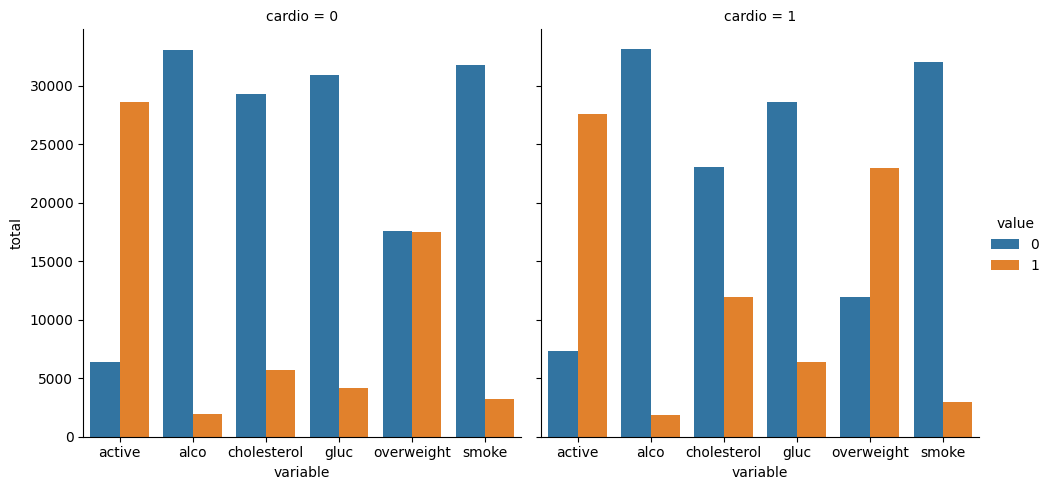

In [ ]:
# Draw the catplot with 'sns.catplot()'
catplot = sns.catplot(
data = df_cat,
kind = 'bar',
x = 'variable',
y = 'total',
hue = 'value',
col = 'cardio')
fig = catplot.fig

In [ ]:
 # Do not modify the next two lines
def draw_cat_plot():
    fig.savefig('catplot.png')
    return fig

In [ ]:
# Draw Heat Map
def draw_heat_map():
   # Clean the data
    df_heat = df[ (df['ap_lo'] <= df['ap_hi']) &
                  (df['weight'] >= df['weight'].quantile(0.025)) &
                  (df['weight'] <= df['weight'].quantile(0.975)) &
                  (df['height'] >= df['height'].quantile(0.025)) &
                  (df['height'] <= df['height'].quantile(0.975))]

In [ ]:
# Calculate the correlation matrix
corr = df_heat.corr()

In [ ]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

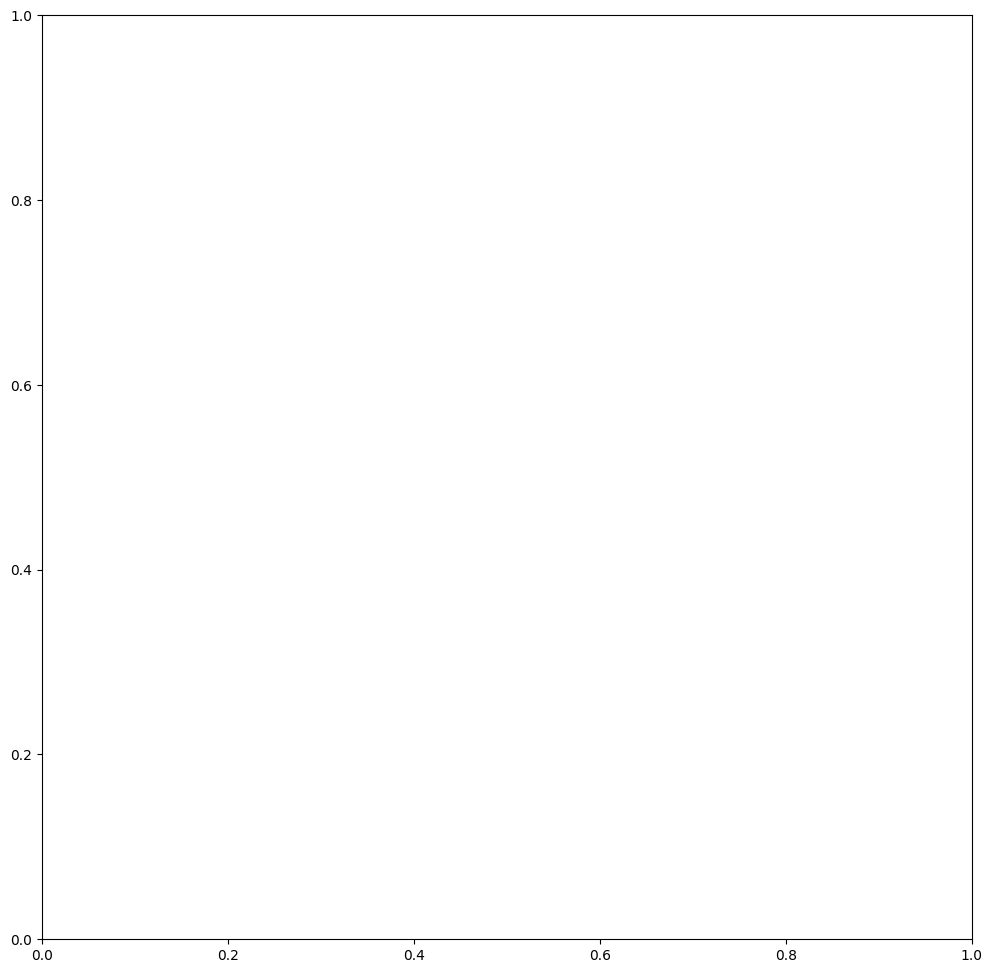

In [ ]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize = (12, 12))

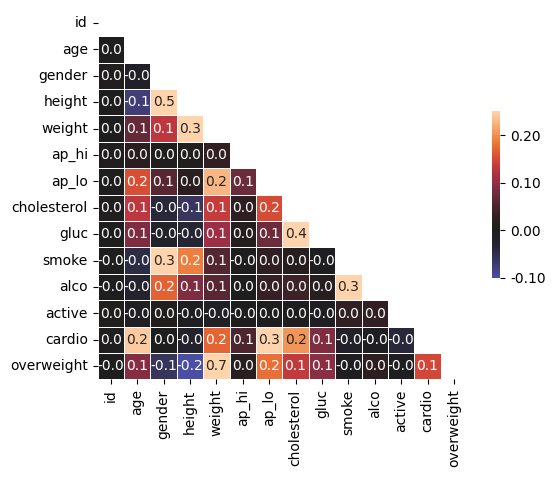

In [ ]:
# Draw the heatmap with 'sns.heatmap()'
ax = sns.heatmap(
        corr,
        mask = mask,
        square= True,
        annot = True,
        linewidths = 0.5,
        fmt = '.1f',
        center = 0,
        vmin = -0.1,
        vmax = 0.25,
        cbar_kws={
            'shrink': .45,
            'format': '%.2f'
        })

In [ ]:
 # Do not modify the next two lines
def draw_heat_map():
  fig.savefig('heatmap.png')
  return fig